In [ ]:
import json
import pandas as pd

In [ ]:
!nvidia-smi

Sun May 29 06:21:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!head -n 3 /proc/meminfo

MemTotal:       26692024 kB
MemFree:        23421088 kB
MemAvailable:   25362048 kB


### Train Data

In [ ]:
with open('/content/drive/MyDrive/캡스톤2/train_original.json', 'r') as f:
  train_data = json.load(f)

In [ ]:
titles = []
texts = []
summaries = []
categories = []
for document in train_data['documents']:
    titles.append(document['title'])
    text = [] 
    for t in document['text']:
        for idx in t:
            text.append(idx['sentence'])
    texts.append(text)
    summaries.append(document['abstractive'][0])
    categories.append(document['category'])

In [ ]:
df = pd.DataFrame(columns=['title', 'text', 'summary', 'category'])
df

Empty DataFrame
Columns: [title, text, summary, category]
Index: []

In [ ]:
for i in range(len(texts)):
    texts[i] = ' '.join(texts[i])

In [ ]:
print(texts[:100])

['ha당 조사료 400만원…작물별 차등 지원 이성훈 sinawi@hanmail.net 전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 시행하는 쌀 생산조정제를 적극 추진키로 했다. 쌀 생산조정제는 벼를 심었던 논에 벼 대신 사료작물이나 콩 등 다른 작물을 심으면 벼와의 일정 소득차를 보전해주는 제도다. 올해 전남의 논 다른 작물 재배 계획면적은 전국 5만ha의 약 21%인 1만 698ha로, 세부시행지침을 확정, 시군에 통보했다. 지원사업 대상은 2017년산 쌀 변동직불금을 받은 농지에 10a(300평) 이상 벼 이외 다른 작물을 재배한 농업인이다. 지원 대상 작물은 1년생을 포함한 다년생의 모든 작물이 해당되나 재배 면적 확대 시 수급과잉이 우려되는 고추, 무, 배추, 인삼, 대파 등 수급 불안 품목은 제외된다. 농지의 경우도 이미 다른 작물 재배 의무가 부여된 간척지, 정부매입비축농지, 농진청 시범사업, 경관보전 직불금 수령 농지 등은 제외될 예정이다. ha(3000평)당 지원 단가는 평균 340만원으로 사료작물 400만원, 일반작물은 340만원, 콩·팥 등 두류작물은 280만원 등이다. 벼와 소득차와 영농 편이성을 감안해 작물별로 차등 지원된다. 논에 다른 작물 재배를 바라는 농가는 오는 22일부터 2월 28일까지 농지 소재지 읍면동사무소에 신청해야 한다. 전남도는 도와 시군에 관련 기관과 농가 등이 참여하는‘논 타작물 지원사업 추진협의회’를 구성, 지역 특성에 맞는 작목 선정 및 사업 심의 등을 본격 추진할 방침이다. 최향철 전라남도 친환경농업과장은 “최근 쌀값이 다소 상승추세에 있으나 매년 공급과잉에 따른 가격 하락으로 쌀농가에 어려움이 있었다”며“쌀 공급과잉을 구조적으로 해결하도록 논 타작물 재배 지원사업에 많이 참여해주길 바란다”고 말했다.', '8억 투입, 고소천사벽화·자산마을에 색채 입혀 이성훈 sinawi@hanmail.net 여수시는 원도심 일대에서 추진된 컬러빌리지 사업을 지난해 말 마무리하며 색채와 빛의 도시를 완성했다. 시

In [ ]:
df['title'] = titles
df['text'] = texts
df['summary'] = summaries
df['category'] = categories

In [ ]:
df

title  \
0                       논 타작물 재배, 2월 말까지 신청하세요   
1                여수시, 컬러빌리지 마무리...‘색채와 빛’도시 완성   
2                      “새해 정기 받고 올해는 반드시 일내자!”   
3                        농업인 역량 강화, 새해 실용교육 실시   
4                        타이완 크루즈관광객 4천여명‘전남’온다   
...                                        ...   
243978                당진시, 찾아가는 청소년 노동인권 교육 진행   
243979                서산시, 2020년 성인문해교실 신청하세요!   
243980                 서산시의회, 제247회 제2차 정례회 개회   
243981              아산시, 온천 재활 헬스케어 힐링산업 본격 추진   
243982  용인 비상에듀 기숙학원, 대입조기선발반 모집... 12월 15일 개강   

                                                     text  \
0       ha당 조사료 400만원…작물별 차등 지원 이성훈 sinawi@hanmail.net...   
1       8억 투입, 고소천사벽화·자산마을에 색채 입혀 이성훈 sinawi@hanmail.n...   
2       전남드래곤즈 해맞이 다짐…선수 영입 활발 이성훈 sinawi@hanmail.net ...   
3       11~24일, 매실·감·참다래 등 지역특화작목 이성훈 sinawi@hanmail.n...   
4       홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항 이성훈 sinawi@hanma...   
...                                                   ...   
243978  내달 12일까지, 노동인권 감수성 높인다 당진시는 지난 12일 첫 교육을 시작으로 ...   
243979  마을별 10명 이상이면 신청가능, 12월 24일까지 모집 서산 마을학교 합동졸업식 ...   
243980  2020년 예산안, 제4회 추경예산안 및 조례안 29건 등 41개 안건 처리 예정 ...   
243981  전담기관 설립 추진, 타당성 검토 용역 착수보고회 개최 아산시(시장 오세현)가 온천...   
243982  용인비상에듀기숙학원 전경 입시 전문 재수기숙학원 용인비상에듀기숙학원이 2021학년도...   

                                                  summary category  
0       전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 대...       종합  
1       여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천사...       종합  
2       전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구단...      스포츠  
3       광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화작...       정치  
4       올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입항...       종합  
...                                                   ...      ...  
243978  당진시는 12일부터 당진시 노동상담소에서지역 청소년들을 대상으로 노동 인권 교육을 ...       종합  
243979  서산시는 배움의 기회를 갖지 못한 어르신을 대상으로 성인문해교실(마을학교)를 운영하...       종합  
243980  서산시의회는 25일 제1차 본회의를 열고 다음달 13일까지 열리는 제247회 제2차...       종합  
243981  아산시가 25일 시청 상황실에서 전국적 허브를 구축하기 위한 재활헬스케어힐링스파산업...       종합  
243982  용인 태화산 끝자락에 위치한 1만여 평 규모의 입시 전문 재수기숙학원 용인비상에듀기...       종합  

[243983 rows x 4 columns]

In [ ]:
df['category'].value_counts()

종합           177558
경제            23938
사회            17650
정치            16389
스포츠            5174
IT,과학          1931
교육/입시/NIE      1190
부동산              74
보건/의료            55
기업               17
북한/한반도정세          5
선거                2
Name: category, dtype: int64

In [ ]:
it_train = df.query("category == 'IT,과학'")
it_train.to_csv('it_train.csv', index=False)

In [ ]:
df.loc[100]['text']

'학생 해외연수비 등 지원 요청…위원들“학교 노력이 우선”지적 이성훈 sinawi@hanmail.net 광양시가 광양보건대가 요청한 예산지원을 일단 보류했다. 대학 측의 학교 살리기 자구 노력 움직임을 살펴본 후 검토하겠다는 입장이다. 이에 따라 광양보건대는 대학 살리기 위한 자체 노력 없이는 시의 지원을 사실상 받을 수 없게 됐다. 시는 지난 20일, 지방대학 지원 사업 심의위원회를 열어 광양보건대가 지원을 요청한 20여억원의 지원근거 등에 대해 심의했다. 보건대는 교육부의 재정지원제한조치에도 불구하고 학생들에 대한 직접 지원은 가능함에 따라 광양시에 학생 해외연수비로 1억5000만원을 지원해 줄 것을 요청한 것으로 알려졌다. 또한 자격증 취득 과정 지원 등 20억원대 지원을 요청했다. 하지만 위원회는 특정학교 학생들을 위한 해외연수비를 시민들의 세금으로 지원하는 것이 타당한가라는 논란 끝에 결국 심의를 보류한 것으로 알려졌다. 광양보건대가 자체적으로 자구노력을 하지 않는 상태에서 교육부의 방침을 어기고 재정지원을 하는 것은 불가능하다는 의견이다. 또한 광양보건대가 지원을 요청한 일부 항목의 경우 교육부의 재정지원 제한조치에도 불구하고 지원이 가능하다고 하지만 이 역시 형평성 차원에서 당장 결정할 수는 없다는 의견이 지배적이다. 이는 지난해 11월 열린 보건대-한려대 살리기 위한 범시민대책위원회에서 나온 의견가 대부분 일치한다. 당시 한려대는 신경대와 통합하는 방안으로 자구책을 찾겠다며 지원을 호소했다. 반면 보건대는 통합 대신 신입생 유치와 시 지원을 통해 회생을 꾀하며 위기를 벗어나려고 했다. 참석한 위원들은“두 대학이 함께 살아갈 수 있는 방법을 찾아야 하는데 자구노력이 너무 부족하다”면서 남에게 의지하는 방식으로 대학을 살리는 방안에 대해 부정적인 입장을 밝혔었다. 교육부로부터 재정지원제한대학으로 지정된 광양보건대는 정부 및 지방자치단체의 재정지원에서 배제되면서 학교 운영에 어려움을 겪고 있으며, 설립자의 비리로 부실대학의 굴레를 벗어나지 못하고 있다

In [ ]:
df.loc[100]['summary']

'광양시는 광양보건대가 자체적으로 자구노력을 하지 않은 상태에서 시민들의 세금으로 해당 학교의 재정지원을 하는 것은 적절하지 않다고 판단하여 보건대의 예산지원 요청을 보류한 상태이다.\n'

In [ ]:
df.to_csv('/content/drive/MyDrive/캡스톤2/train.csv', index=False)

### Validation Data

In [ ]:
with open('/content/drive/MyDrive/캡스톤2/valid_original.json', 'r') as f:
  valid_data = json.load(f)

In [ ]:
valid_data

{'delivery_date': '2020-12-23 12:01:15',
 'documents': [{'abstractive': ['8일 서울에서 열린 5G플러스 전략발표에 참석한 문재인 대통령은 5G는 대한민국 혁신성장의 인프라이자 "넓고, 체증 없는 \'통신 고속도로\'"라고 강조하며 5G가 각 분양에 융합되면 정보통신산업을 넘어 제조업과 벤처에 이르러 우리 산업 전체의 혁신을 통한 동반성장이 가능하다고 언급했다.'],
   'annotator_id': 4209,
   'category': '정치',
   'char_count': '1111',
   'document_quality_scores': {'accurate': 5,
    'informative': 5,
    'readable': 5,
    'trustworthy': 5},
   'extractive': [0, 1, 3],
   'id': '340626877',
   'media_name': '한국경제',
   'media_sub_type': '경제지',
   'media_type': 'online',
   'publish_date': '2019-04-08 17:43:00',
   'size': 'medium',
   'text': [[{'highlight_indices': '80,82',
      'index': 0,
      'sentence': '[ 박재원 기자 ] \'대한민국 5G 홍보대사\'를 자처한 문재인 대통령은 "넓고, 체증 없는 \'통신 고속도로\'가 5G"라며 "대한민국의 대전환이 이제 막 시작됐다"고 기대감을 높였다.'}],
    [{'highlight_indices': '',
      'index': 1,
      'sentence': '문 대통령은 8일 서울 올림픽공원에서 열린 5G플러스 전략발표에 참석해 "5G 시대는 우리가 생각하고, 만들면 그것이 세계 표준이 되는 시대"라며 "5G는 대한민국 혁신성장의 인프라"라고 강조했다.'},
     {'highlig

In [ ]:
titles = []
texts = []
summaries = []
category = []
for document in valid_data['documents']:
    titles.append(document['title'])
    text = [] 
    for t in document['text']:
        for idx in t:
            text.append(idx['sentence'])
    texts.append(text)
    summaries.append(document['abstractive'][0])
    category.append(document['category'])

In [ ]:
val_df = pd.DataFrame(columns=['title', 'text', 'summary', 'category'])
val_df

Empty DataFrame
Columns: [title, text, summary, category]
Index: []

In [ ]:
for i in range(len(texts)):
    texts[i] = ' '.join(texts[i])

In [ ]:
print(texts[:100])

['[ 박재원 기자 ] \'대한민국 5G 홍보대사\'를 자처한 문재인 대통령은 "넓고, 체증 없는 \'통신 고속도로\'가 5G"라며 "대한민국의 대전환이 이제 막 시작됐다"고 기대감을 높였다. 문 대통령은 8일 서울 올림픽공원에서 열린 5G플러스 전략발표에 참석해 "5G 시대는 우리가 생각하고, 만들면 그것이 세계 표준이 되는 시대"라며 "5G는 대한민국 혁신성장의 인프라"라고 강조했다. 산업화 시대에 고속도로가 우리 경제의 \'대동맥\' 역할을 했듯, 5G가 4차 산업혁명 시대의 고속도로가 돼 새로운 기회를 열어 줄 것이란 설명이다. 문 대통령은 "5G가 각 분야에 융합되면, 정보통신산업을 넘어 자동차, 드론(무인항공기), 로봇, 지능형 폐쇄회로TV(CCTV)를 비롯한 제조업과 벤처에 이르기까지 우리 산업 전체의 혁신을 통한 동반성장이 가능하다"고 밝혔다. 세계 최초 상용화에 성공한 5G가 반도체를 이을 우리 경제의 새 먹거리가 될 것이란 관측이다. 정부는 2026년 세계 5G 시장 규모가 1161조원에 달할 것으로 보고 있다. 작년 반도체 시장 규모가 529조원인 점을 고려하면 2배 이상 큰 미래 시장이 창출되는 셈이다. 문 대통령은 아직은 국민에게 다소 낯선 5G 시대의 미래상을 친절히 설명해 눈길을 끌기도 했다. 문 대통령은 "\'지금 스마트폰으로 충분한데, 5G가 왜 필요하지?\'라고 생각할 수 있다"며 "4세대 이동통신은 \'아직은\' 빠르지만 가까운 미래에는 결코 빠르지 않다"고 했다. 그러면서 "자동차가 많아질수록 더 넓은 길이 필요한 것처럼 사물과 사물을 연결하고, 데이터를 주고받는 이동통신망도 더 넓고 빠른 길이 필요하다"고 덧붙였다. 문 대통령은 세계 최초 상용화에 성공한 우리 5G 기술을 널리 알리는 홍보대사를 자처하기도 했다. 5G 시장을 선점하기 위한 각국의 경쟁이 뜨겁게 달아오른 만큼 정부 차원에서 적극 지원하겠다는 방침이다. 문 대통령은 "평창동계올림픽 360도 중계, 작년 4·27 남북한 정상회담 때 프레스센터에서 사용된 스마트월

In [ ]:
val_df['title'] = titles
val_df['text'] = texts
val_df['summary'] = summaries
val_df['category'] = category

In [ ]:
val_df

title  \
0                             文대통령 "5G는 4차산업혁명 시대의 고속도로"   
1                         "손학규 물러나라"...바른계, 최고위 회의 '보이콧'   
2                      "마치 한 장소처럼" ... 5G로 서울·부산·광주 원격협연   
3         "이웃도 모르는데, 이게 서울 미래냐"...'고층 재개발 요구' 작심 비판한 박원순   
4                      "SK·알파벳 벤치마킹해야"...KB운용, KMH에 주주서한   
...                                                  ...   
30117                  영주시,외국인근로자 관광명소 문화탐방... 한국생활 정착도와   
30118                  달 탐사 50주년 기념...전국 과학관에서 우주특별전 열린다   
30119  황교안대표 영주서 자유한국당 영주.문경예천당원협의회 시국강연 가져 ....내년총선 ...   
30120           예천군,양질의 일자리 창출 총력....사회적 경제 기업 활성화에 두팔걷어   
30121                ‘수도권 30만가구 공급 본격화... 의왕 청계2 등 지구 지정   

                                                    text  \
0      [ 박재원 기자 ] '대한민국 5G 홍보대사'를 자처한 문재인 대통령은 "넓고, 체...   
1      ] 당 지도부 퇴진을 놓고 바른미래당 내홍이 격화되고 있다. 바른미래당이 8일 연 ...   
2      [ 홍윤정 기자 ] 8일 서울 올림픽공원 K아트홀. 지난 3일 한국이 세계 최초로 ...   
3      ] 박원순 서울시장(사진)이 8일 고층 재개발·재건축 관련 요구에 작심한 듯 쓴소리...   
4      [ 임근호 기자 ] "SK(주)와 미국 알파벳(구글 지주회사)의 간결한 지배구조를 ...   
...                                                  ...   
30117  영주시는 이억만리에서 건너온 계절근로자들의 향수를 달래고 안정된 한국생활 적응을 돕...   
30118  여름 방학을 맞아 전국의 국립과학관에서 달 탐사 50주년과 국제천문연맹(IAU) 설...   
30119  영주문경예천 당원협의회 시국강연 및 당원교육에 참석차 영주를 방문한 황교안(오른쪽)...   
30120  경북예천군은 장기적인 국내 경기침체가 지속됨에 따라 사회적경제 기업 육성 등을 통한...   
30121  3기 신도시 등 '수도권 30만 가구 공급' 계획이 7월 의왕 청계2, 성남 신촌 ...   

                                                 summary category  
0      8일 서울에서 열린 5G플러스 전략발표에 참석한 문재인 대통령은 5G는 대한민국 혁...       정치  
1      8일 바른미래당 최고의원 회의에 하태경 의원 등 5명의 최고의원이 지도부 퇴진을 요...       종합  
2      지난 3일 한국이 세계 첫 5세대 이동통신 서비스를 보편화한 것을 축하하는 '코리안...    IT,과학  
3      박원순 서울시장은 8일 서울시청에서 열린 '골목길 재생 시민 정책 대화'에 참석하여...       사회  
4      주주가치 포커스를 운용하는 KB자산운용이  SK와 알파벳(구글 지주회사)의 모범적 ...       경제  
...                                                  ...      ...  
30117  영주시는 외국인 근로자들의 향수를 달래고, 안정적인 한국생활 적응을 지원하기 위해 ...       종합  
30118  달 탐사 50주년과 국제천문연맹(IAU)설립 100주년 기념하는 특별전시가 전국의 ...       경제  
30119  황교안 대표는 지난 29일 자유한국당 대표로 경북 영주문경예청 당원협의회 당원교육에...       종합  
30120  경북예천군은 사회적경제 기업 육성 등을 통한 일자리 창출에 행정동력을 집중한 결과 ...       종합  
30121  국토교통부에 따르면 의왕 청계2, 성남 신총 등 4개 지구가 중앙도시계획위 심의를 ...       경제  

[30122 rows x 4 columns]

In [ ]:
val_df['category'].value_counts()

종합       13666
IT,과학    10997
경제        3403
사회        1503
스포츠        392
정치         161
Name: category, dtype: int64

In [ ]:
it_df = val_df.query('category == "IT,과학"')
it_df.to_csv('it_val.csv', index=False)

In [ ]:
val_df.loc[100]['summary']

'14일에 창립 40주년을 맞는 롯데월드타워에서는 요가축제 \'요가말라\'를 \'월드파크\'에서 개최한다는데 이는 성장세의 \'애슬레저\'를 키워내려는 노력의 일환이며 롯데의 관계자는 "1200여명의 요가인이 함께 할 것"이라고 전했다.'

In [ ]:
val_df.to_csv('/content/drive/MyDrive/캡스톤2/validation.csv', index=False)

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 14.2 MB/s 
     |████████████████████████████████| 596 kB 71.7 MB/s 
     |████████████████████████████████| 6.6 MB 84.5 MB/s 
     |████████████████████████████████| 86 kB 4.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, BartConfig, BartForConditionalGeneration, DataCollatorWithPadding
from torch.utils.data import DataLoader
import torch

#from rouge import Rouge 

In [ ]:
model_dir = 'hyunwoongko/kobart'

model_config = BartConfig.from_pretrained(model_dir)
tokenizer = AutoTokenizer.from_pretrained(model_dir)
#model = BartForConditionalGeneration.from_pretrained(model_dir, config=mode

Downloading:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


Downloading:   0%|          | 0.00/337 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110 [00:00<?, ?B/s]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/캡스톤2/val_IT.csv')
text = list(df['text'])
summary = list(df['summary'])

In [ ]:
df

title  \
0                아우디, 2019년식 'A5 스포트백' 사전계약...가격 6237만원   
1                  한샘 빌트인플러스, 4개월 누적매출 70억...월평균 70% 성장   
2            미래 자동차 인재 한 자리에...'KEA, 제1회 미래형자동차 인재페스티벌'   
3                      IBS, 국제 연구로 원자 양자 상태 정밀 제어 기술 개발   
4                “원전 수출 책임진다”... 탈원전 공격에 한수원 사장 '작심 발언'   
...                                                 ...   
2195                         사공정규 동국의대 교수, 대구토요마당 조찬 강연   
2196                 소상공인연합회, 9월 국회 앞두고 '소상공인기본법' 제정 촉구   
2197  'LG 울트라기어' 게이밍 모니터, 세계 최초로 'IPS 패널'에 가장 빠른 1㎳ ...   
2198                        KT 회장 후보 총 37명···연내 1명으로 압축   
2199               기아차, 7월 판매량 22만5902대...전년 대비 2.7% 감소   

                                                   text  \
0     아우디코리아(사장 세드릭 주흐넬)는 26일부터 '아우디 A5 스포트백 45 TFSI...   
1     종합 홈인테리어 전문기업 한샘은 올해 3월 첫 선을 보인 '빌트인플러스'이 출시 4...   
2     미래 자동차 분야 융합 인재들이 한 자리에 모인다. 한국전자정보통신산업진흥회(KEA...   
3     기초과학연구원(IBS) 연구진이 국내 공동 연구로 원자 양자 상태를 정밀 제어하고 ...   
4     정재훈 한국수력원자력 사장이 탈원전 정책과 상관없이 세계 각국에서 진행중인 원전사업...   
...                                                 ...   
2195  사공정규 동국의대 정신건강의학과 교수가 대구토요마당에서 강연하고 있다. 대구토요마당...   
2196  소상공인연합회(회장 최승재,사진 오른쪽에서 네번째)는 17일 서울 영등포구 국회 본...   
2197  LG전자 모델들이 나노 IPS 디스플레이와 1ms 응답속도를 갖춘 LG 울트라기어 ...   
2198  KT 차기 회장 후보가 총 37명으로 확정됐다. KT는 이르면 연내 최종 후보를 결...   
2199  기아자동차는 7월 도매 판매 기준 전년동기 대비 2.7% 감소한 22만5902대를 ...   

                                                summary category  
0     최고출력 252마력, 최고속도 210km/h에 달하는 2019년식 아우디 A5 스포...    IT,과학  
1     한샘은 30일 올해 3월 첫 선을 보인 '빌트인플러스' 출시 4개월 만에 누적 매출...    IT,과학  
2     한국전자정보통신산업진흥회(KEA)는 미래 자동차 융합 인재들이 한 자리에 모이는 '...    IT,과학  
3     기초과학연구원은 표면 위 양자 시스템을 제어와 양자를 이용한 정보 처리 기술력을 높...    IT,과학  
4     정재훈 한국수력원자력 사장은 신한울 3,4호기 구축은 '취소'가 아닌 '보류'라고 ...    IT,과학  
...                                                 ...      ...  
2195  대구토요마당은 12일 사공정규 동국의대 정신건강의학과 교수를 초청해 정신건강 즉문즉...    IT,과학  
2196  소상공인연합회(회장 최승재)는 17일 서울 영등포구 국회 본관 앞에서 '소상공인기본...    IT,과학  
2197  7일 LG전자는 프리미엄 모니터 시장 공략을 위해 'LG 울트라기어' 게이밍 모니터...    IT,과학  
2198  사내·외 KT 차기 회장 후보가 총 37명으로 확정되었으며  빠르면 연내에 최종 후...    IT,과학  
2199  기아자동차는 해외판매 실적이 감소하여 7월 도매 판매 기준 전년동기 대비 2.7% ...    IT,과학  

[2200 rows x 4 columns]

In [ ]:
t = tokenizer(text)
s = tokenizer(summary)
#text

In [ ]:
lengths = []
lengths_s = []
count = 0
for a, b in zip(t['input_ids'], s['input_ids']):
  lengths.append(len(a))
  lengths_s.append(len(b))
  if len(a) > 1024:
    count += 1
#tokenizer.convert_ids_to_tokens(t['input_ids'])

In [ ]:
print(count)
print(lengths)
print(lengths_s)
print(len(lengths), len(lengths_s))

ratio = []
for a, b in zip(lengths, lengths_s):
  ratio.append(a/b)

0
[321, 298, 374, 326, 552, 548, 610, 479, 326, 285, 565, 433, 489, 539, 319, 396, 340, 453, 317, 555, 506, 479, 555, 427, 616, 344, 629, 367, 335, 527, 321, 568, 383, 524, 323, 448, 598, 516, 326, 392, 344, 323, 301, 596, 336, 424, 286, 596, 314, 415, 564, 299, 559, 309, 609, 439, 596, 484, 557, 424, 343, 504, 281, 502, 324, 644, 510, 556, 359, 420, 375, 292, 377, 373, 398, 504, 601, 325, 705, 410, 271, 265, 660, 442, 343, 456, 282, 316, 558, 379, 524, 357, 550, 425, 503, 365, 361, 683, 446, 273, 610, 330, 526, 390, 616, 610, 352, 483, 287, 592, 376, 372, 583, 366, 336, 345, 379, 735, 398, 385, 422, 368, 578, 380, 325, 386, 288, 419, 499, 766, 454, 426, 729, 340, 334, 700, 424, 473, 443, 441, 523, 508, 296, 304, 314, 319, 326, 396, 271, 418, 434, 456, 354, 317, 526, 624, 410, 544, 347, 494, 691, 312, 778, 359, 644, 563, 298, 680, 368, 475, 346, 414, 342, 514, 440, 454, 377, 364, 369, 642, 312, 310, 435, 280, 401, 291, 399, 378, 312, 270, 336, 587, 706, 628, 271, 538, 449, 491, 388, 63

In [ ]:
import numpy as np
np.mean(ratio)

8.017418843040668

In [ ]:
import numpy as np

In [ ]:
max_len = np.max(lengths)
max_len

321

In [ ]:
np.min(lengths)

6

In [ ]:
np.mean(lengths)

56.66579910566073

In [ ]:
print(lengths.index(max_len))
max_idx = lengths.index(max_len)

152573


In [ ]:
text[max_idx]

'충주시가 3일 호암지 저수지에서 육식어종의 절대자로 군림한 외래종 배스와 블루길(파랑볼 우럭)의 개체수를 줄이고 다양한 생물이 공존하도록 하기 위해 상지대학교의 2018년 호암지 수생태계 모니터링 용역결과에 따라 배스와 블루길의 생태를 제어하는데 토종 육식어종인 가물치와 메기가 효과가 있다는 제안에 따라 국내 토종 민물고기인 가물치 성어 500㎏과 메기 성어 142㎏를 방류했다.\n\n배스와 블루길의 생태를 제어하는데 토종 육식어종인 가물치와 메기를효과가 있다는\n\n 시범적으로 선택한 것은 배스와 블루길의 생태를 제어하는데 효과가 있다는 \n상지대학교의 2018년 호암지 수생태계 모니터링 용역결과 제안에 따른 것이다.\n\n국내 토종 민물고기인 수생태계 회복을 위해 가물치 성어 500㎏과 메기 성어 142㎏를 방류했다.\n\n시는 저수지에서 육식어종의 절대자로 군림한 외래종 배스와 블루길(파랑볼우럭)의 개체수를 줄이고 다양한 생물이 공존하도록 하기 위해 국내 토종 민물고기인 가물치와 메기를 방류해 건강한 수생태계 피라미드를 만들 계획이다.\n\n시가 외래종 퇴치에 토종 육식어종인 가물치와 메기를 시범적으로 선택한 것은 배스와 블루길의 생태를 제어하는데 효과가 있다는 상지대학교의 2018년 호암지 수생태계 모니터링 용역결과 제안에 따른 것이다.'

In [ ]:
df['title'][max_idx]

'충주 호암지에 배스 천적인 토종물고기 방류'

In [ ]:
df['text'][max_idx]

'충주시가 3일 호암지 수생태계 회복을 위해 가물치 성어 500㎏과 메기 성어 142㎏를 방류했다. 호암지는 1932년 농업용수 공급용도로 조성된 저수지로, 2009년 생태공원으로 개원해 충주시민의 휴식공간으로 사랑받는 곳이다. 지난해 호암지 내 생물다양성 조사 용역결과 토종어류는 붕어, 잉어, 가물치, 메기, 동자개, 자라, 대륙송사리, 몰개, 참몰개, 누치, 치리, 강준치, 참붕어, 민물검정망둑 등 14종의 토종어류와 블루길, 배스, 붉은귀거북, 떡붕어 등 4종의 외래어종이 서식하고 있는 것으로 조사됐다. 시는 저수지에서 육식어종의 절대자로 군림한 외래종 배스와 블루길(파랑볼우럭)의 개체수를 줄이고 다양한 생물이 공존하도록 하기 위해 국내 토종 민물고기인 가물치와 메기를 방류해 건강한 수생태계 피라미드를 만들 계획이다. 시가 외래종 퇴치에 토종 육식어종인 가물치와 메기를 시범적으로 선택한 것은 배스와 블루길의 생태를 제어하는데 효과가 있다는 상지대학교의 2018년 호암지 수생태계 모니터링 용역결과 제안에 따른 것이다. 시는 추가로 더베이스호텔 앞 생태늪지에 토종물고기인 버들붕어를 방류해 수생태계의 다양성을 확보할 계획이다. 시 관계자는 "호암지가 토종 민물고기 서식기반을 넓혀 건강한 생태저수지로 복원하기를 바란다"며 "시민들과 자라나는 청소년들의 생태교육장으로 활용되기를 기대한다"고 말했다.'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

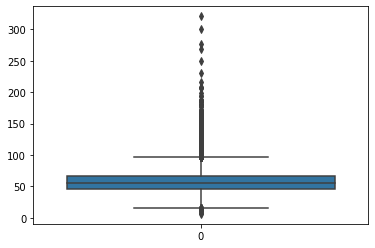

In [ ]:
sns.boxplot( data=lengths)
plt.show()

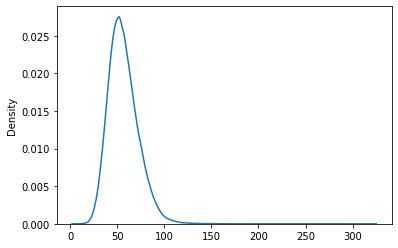

In [ ]:
sns.kdeplot(lengths)
plt.show()

In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/캡스톤2/train.csv')

In [ ]:
sampled_train = train_df.sample(n=10000)

In [ ]:
sampled_train

title  \
63215      토지 소유권 분쟁 해결한 '수성범어W'...이달 중 분양 가능할까   
26642          루원中 지하로 지나가는 철로 학교 대신 7호선 노선 옮길까   
215532             파주혁신교육지구 사업 일환, 마을강사 모집 및 교육   
155039                  중원대학교, 제4대 총장 김두년 박사 취임   
82239         민주당 “추경 급한데 돌아오라”...한국당 여론 살피며 투쟁   
...                                         ...   
110032    MBC ‘웰컴2라이프’임지연 VS 손병호, 사건으로 본 악연 정리!   
211102            삼광글라스 '글라스락' 세계일류상품에 9년 연속 선정   
101014  “호남에서 가장 깊은 역사”... 조선대학교 간호학과 50주년 기념행사   
78062                      열대야, 폭염주의보로 건강 잘 챙겨야   
43817          대구 연구개발특구, 다이나믹 이노베이터 1기 데모데이 성료   

                                                     text  \
63215   초등학교 증축 문제도 해결…일부 터 가처분신청 말소가 마지막 숙제초등학교 증축 문제...   
26642   홍봄 기자 일부 구간 겹쳐 안전 등 우려 제기 일조권 등 용지변경 현실적 불가능 지...   
215532  경기파주시는 2020년도 파주혁신교육지구 사업 일환으로 지역 내 인적·물적 자원을 ...   
155039  취임식, 검소한 내부행사로 치러 [충청투데이 김영 기자] 중원대학교는 2일 오전 본...   
82239   국회 정상화를 위한 협상 교착이 장기화하면서 여야의 셈법이 복잡해지고 있다. 여당은...   
...                                                   ...   
110032  '웰컴2라이프' 임지연-손병호의 10년 묵은 뿌리 깊은 악연에 관심이 쏠리고 있다....   
211102  삼광글라스의 유리밀폐용기 '글라스락'이 9년 연속 세계일류상품에 선정됐다. 12일 ...   
101014  1969년 12월 전국 6번째로 개설 동문 재학생 한데 모여 화합 ‘축제’ 홍성장 ...   
78062   새전북 신문 “지역별로 열대야, 폭염주의보 등 발효 홀로 사는 어르신 안부 살펴야”...   
43817   액셀러레이팅 프로그램 통해 창업기업 육성, 투자 유치 등 성과 연구개발특구진흥재단 ...   

                                                  summary  
63215   토지 보상금 분쟁은 해결하였지만 아직 '부동산처분금지 가처분신청'을 말소해야하는 대...  
26642   인천 루원중학교의 신설을 위한 교육환경평가에서 시설 안전을 위해 학교와 철로를 이격...  
215532  경기파주시는 2020년도 파주혁신교육지구 사업 일환으로 교사와 협력해 학생 교육을 ...  
155039  중원대학교 김두년 신임총장이 2일 오전 본관 CEO룸에서 교직원 및 학생대표만 참석...  
82239   민주당은 당초 여야 합의로 5월 임시국회를 소집해 늦어도 다음 달 12일까지 추경을...  
...                                                   ...  
110032  MBC 월화미니시리즈 '웰컴2라이프'에서 임지연-손병호의 악연이 10년 전부터 이어...  
211102  삼광글라스는 산업통상자원부가 주최하는 '2019년 세계일류상품'에서 유리밀폐용기 부...  
101014  4일 조선대에 따르면 지난 1969년 12월27일에 편제 정원 30명으로 새로이 개...  
78062   전주기상지청은 한낮에도 유입된 고온다습한 남서기류가 밤에도 계속되면서 22일 밤부터...  
43817   연구개발특구진흥재단 대구본부의 액셀러레이팅 프로그램인 다이나믹 이노베이터 1기 데모...  

[10000 rows x 3 columns]

In [ ]:
sampled_train.to_csv('/content/drive/MyDrive/캡스톤2/sampled10000_train.csv', index=False)

In [ ]:
val_df = pd.read_csv('/content/drive/MyDrive/캡스톤2/validation.csv')

In [ ]:
sampled_val = val_df.sample(n=3000)

In [ ]:
sampled_val

title  \
9451       닥스콘·반올림에이드 “스포츠콘텐츠·ICT 융합해 체육인 사회진출 견인”   
24561                  檢 ‘김학의 별장 성접대’ 윤중천 구속영장 재청구   
13262           전남도, 에너지 산학융합지구 준공식·에너지 신기술연구소 착공식   
437    말말말｜김학의 동영상 원본 최초 공개..."이걸 보고도 무고죄로 고소를 해?"   
14345                           "사우디 원전 후보 3월에 압축"   
...                                            ...   
14302                        경기도 특사경, '동물학대' 연중 수사   
18510                         쌍용건설 '싱가포르 안전보건상' 수상   
21177                       손가락 습진, 조기 치료로 후유증 막아야   
11672                 코스맥스, 뉴스킨과 업무협약...K뷰티 세계화 박차   
12895              기아차 텔루라이드, 美 모터트렌드 '올해의 SUV' 선정   

                                                    text  \
9451   정기태 닥스콘 대표(오른쪽)가 신성진 반올림에이드 대표와 최근 체육인 사회진출을 위...   
24561  [헤럴드경제=김진원 기자] 김학의(63·구속) 전 법무부 차관의 '별장 성접대' 사...   
13262  전라남도는 25일 지역 대학과 기업이 함께 청년 취업을 돕고 기업 구인난을 해소하기...   
437    '김학의 사건'의 출발점이 됐던 이른바 '김학의 동영상'의 고화질 원본이 공개돼 파...   
14345  김종갑(사진) 한국전력 사장은 29일 "한국과 미국 중국 프랑스 러시아 등 5개국이...   
...                                                  ...   
14302  동물보호법 수사범위 추가 경기도 특별사법경찰단(특사경)이 동물의 생명과 복지를 해치...   
18510  쌍용건설이 최근 싱가포르 노동부가 주관하는 안전보건상을 수상했다. 쌍용건설은 싱가포...   
21177  손가락 습진은 주부습진으로도 불리는데 홍반과 각질, 가려움증을 동반하며 특히 요즘 ...   
11672  화장품 연구·개발·생산(ODM)기업 코스맥스가 뉴스킨 코리아와 손잡고 글로벌 시장 ...   
12895  기아자동차는 미국 자동차 전문지 모터트렌드 '2020년 올해의 스포츠유틸리티차량(S...   

                                                 summary  
9451   멀티미디어 디지털콘텐츠 기업 닥스콘이 현역 운동선수의 사회진출을 컨설팅하는 프로그램...  
24561  김학의(63·구속) 전 법무부 차관의 '별장 성접대' 사건에 대해 검찰 수사단(단장...  
13262  전라남도는 25일 지역 대학과 기업이 협력해 청년 취업을 돕고 기업 구인난을 해소하...  
437    YTN은 12일 김학의 원본 동영상을 최초로 입수해 국민의 알 권리, 또 검찰의 부...  
14345  김종갑 한국전력 사장은 한국과 미국 등 5개국이 수주전을 벌이고 있는 사우디아라비아...  
...                                                  ...  
14302  경기도 특별사법경찰단(특사경)이 동물보호법에 의거 동물의 생명과 복지를 해치는 각종...  
18510  싱가포르 안전보건위원회가 매년 안전보건시스템을 갖춘 시공사에게 수여하는 안전보건상을...  
21177  손가락 습진은 홍반과 각질, 가려움증을 동반하며 질환의 특성상 물에 닿으면 통증을 ...  
11672  지난 4일 코스맥스는 그룹회장과 뉴스킨 대표 등 관계자 20여명이 참석한 가운데 성...  
12895  기아차의 북미 전용 모델인 텔루라이드가 한국 브랜드로는 처음으로 미국 자동차 전문지...  

[3000 rows x 3 columns]

In [ ]:
sampled_val.to_csv('/content/drive/MyDrive/캡스톤2/sampled_val.csv', index=False)

In [ ]:
it_data = pd.read_csv('/content/drive/MyDrive/캡스톤2/it_val.csv')

In [ ]:
it_data

title  \
0       "마치 한 장소처럼" ... 5G로 서울·부산·광주 원격협연   
1        과학계 "봄철 고농도 초미세먼지, 중국보다 국내요인 높아"   
2                크라우드펀딩 보상형? 투자형? 어떻게 다르지   
3         박찬호·배용준·최시원·이제훈...스타, 스타트업에 꽂히다   
4           유튜브 탄 K팝...자고 나면 '1억 타이틀' 新바람   
...                                   ...   
10992       닷밀, N서울타워 무대로 몰입형 미디어아트 전시 구현   
10993         ‘흥행조짐’ 클럽오디션, 동남아 댄스열풍 일으키나   
10994       유승민 IOC 위원, 한국e스포츠협회 명예 고문 합류   
10995  이엔피게임즈 캐주얼 라인업, 글로벌 500만 다운로드 ‘쾌거’   
10996               탭조이, 성공 사례 세미나 성황리 개최   

                                                    text  \
0      [ 홍윤정 기자 ] 8일 서울 올림픽공원 K아트홀. 지난 3일 한국이 세계 최초로 ...   
1      봄철 고농도 초미세먼지(PM 2.5)의 주요인은 중국발이 아닌 국내 요인이며 대기정...   
2      ] 크라우드펀딩은 대중(crowd)과 자금조달(funding)의 합성어다. 창의적 ...   
3      ] 지난달 말 열린 자동차 유통 스타트업(신생 벤처기업) 겟차의 주주총회에 낯익은 ...   
4      글로벌 동영상 유통 서비스 유튜브를 타고 K팝의 해외 진출 속도가 빨라지고 있다. ...   
...                                                  ...   
10992  국내 혼합현실(MR) 전문기업 닷밀이 남산에 위치한 N서울타워에서 상설 운영되는 몰...   
10993  모바일 리듬댄스 게임 '클럽오디션'이 태국에 출시된다. 사전 예약에 50만명이 넘게...   
10994  한국e스포츠협회(이하 협회)는 IOC(국제올림픽위원회) 유승민 선수위원을 명예 고문...   
10995  지난해부터 이엔피게임즈가 꾸준히 선보여온 캐주얼 모바일게임들이 전 세계 시장에서 누...   
10996  글로벌 모바일 광고 플랫폼 탭조이 코리아는 6월 26일 서울 강남 팁스홀에서 '광고...   

                                                 summary category  
0      지난 3일 한국이 세계 첫 5세대 이동통신 서비스를 보편화한 것을 축하하는 '코리안...    IT,과학  
1      봄철 고농도 초미세먼지의 주요 원인은 중국발보다 국내 영향이 크며 대기정체가 그 직...    IT,과학  
2      크라우드펀딩은 대중(crowd)과 자금조달(funding)의 합성어로써 두 가지 종...    IT,과학  
3      부동산뿐이던 스타들의 투자가 스타트업 방향으로 옮겨가고 있으며 일찍이 '투자 귀재'...    IT,과학  
4      유튜브를 통해 걸그룹 블랙핑크가 신곡 'KILL THIS LOVE' 뮤직비디오를 공...    IT,과학  
...                                                  ...      ...  
10992  국내 혼합현실 전문기업 닷밀이 N서울타워 운영사인 CJ푸드빌과 몰입형 미디어아트 전...    IT,과학  
10993  원작의 매력들을 그대로 녹여낸 '클럽오디션'이 오는 11일부터 태국 서비스를 시작하...    IT,과학  
10994  한국e스포츠협회가 6월 10일 e스포츠 명예의 전당에서 유승민 위원을 명예 고문 및...    IT,과학  
10995  국내에서 다수의 게임 퍼블리싱 경험을 통해 서비스 역량와 운영 노하우를 쌓아온 이엔...    IT,과학  
10996  글로벌 모바일 광고 플랫폼 탭조이 코리아는 6월 26일 강남 팁스홀에서 '광고 수익...    IT,과학  

[10997 rows x 4 columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(it_data, test_size=0.2)

In [ ]:
train

title  \
2469                  무협, '외식 프랜차이즈 베트남 진출 설명회' 개최   
6545              KIST, 빛 쪼이면 활성화되는 새로운 항암 나노물질 개발   
9526         배터리 핵심 광물 리튬 가격 '급락'...中 전기차 시장 둔화 여파   
2837                      쿠첸, '더 와이드 에어프라이어 오븐' 출시   
8761                    SK텔레콤, 고객 초청 미식행사 '테이블' 개최   
...                                            ...   
10249              '단식' 승부수 띄운 황교안...패스트트랙 저지 가능할까   
6773   부산 서면 랜드마크 삼정타워 Q.라운지, 브런치 메뉴 출시 기념 프로모션 진행   
10431                    SK바이오팜, 독자 신약 美 FDA 허가 획득   
10976         남양유업, 아기먹거리 전도사 '옳은맘 서포터즈' 3기 수료식 진행   
10735               데이터업계, 데이터인의 밤서 '데이터 3법 통과' 촉구   

                                                    text  \
2469   한국무역협회가 30일 삼성동 트레이드타워에서 개최한 외식 프랜차이즈 기업 베트남 시...   
6545   스스로 나노구조를 형성해 암 종양에 쌓여 강력한 항암 효능을 발휘하는 항암물질이 개...   
9526   리튬이온 배터리 양극재 필수 원재료 광물 중 하나인 리튬 가격이 최근 급락하면서 글...   
2837   쿠첸이 더 와이드 에어프라이어 오븐을 새로 출시했다. 쿠첸이 '더 와이드 에어프라이...   
8761   SK텔레콤이 T멤버십 고객과 만 30년 이상 이동통신 가입고객을 초청, 호텔 식사 ...   
...                                                  ...   
10249  황교안 자유한국당 대표가 20일 선거법 개정안과 고위공직자범죄수사처(공수처) 설치법...   
6773   부산 서면 '삼정타워' 8층에 위치한 Q.Lounge(이하 Q.라운지)가 '브런치 ...   
10431  SK바이오팜 연구진이 신약 연구를 하고 있다. SK바이오팜(대표 조정우)은 독자 개...   
10976  남양유업이 28일 본사 1964빌딩 대강당에서 바르고 건강한 아기먹거리 전도사 '옳...   
10735  데이터 업계 한해 노고를 격려하고 데이터산업 발전을 위해 애쓴 공로자를 축하하는 '...   

                                                 summary category  
2469   30일 한국무역협회는 베트남 최대 외식기업 레드썬을 초청해  트레이드타워에서 '외식...    IT,과학  
6545   한국과학기술연구원 소속 김광명 박사팀은 인체 투입 후 레이저를 비추면 빛에 반응하여...    IT,과학  
9526   중국의 전기차 판매 성장세가 약화됨에 따라 지난 7일 탄산리튬 가격은 작년 상반기 ...    IT,과학  
2837   쿠첸이 5일 출시하기로 한 '더 와이드 에어프라이어 오븐'은 넓은 실조리 공간으로 ...    IT,과학  
8761   SK텔레콤은 이동통신 가입고객 및 만 30년 이상 가입고객을 초청해 미식행사 '테이...    IT,과학  
...                                                  ...      ...  
10249  황교안 자유한국당 대표가 20일 국회에서 2주일 앞으로 다가온 패스트트랙 강행 분위...    IT,과학  
6773   부산 서면의 삼정타워 Q는 새롭게 출시한 브런치 메뉴인 리코타치즈 샐러드, 프렌치 ...    IT,과학  
10431  SK바이오팜 연구진이 신약 연구를 하는데 SK바이오팜의 대표 조정우는 22일 독자 ...    IT,과학  
10976  남양유업이 남양유업의 아기먹거리를 직접 체험하고 그 우수성을 알리는 전도사 역할을 ...    IT,과학  
10735  데이터 업계는 26일 서울 쉐라톤 팔래스 강남에서 '2019 데이터인의 밤' 행사를...    IT,과학  

[8797 rows x 4 columns]

In [ ]:
test

title  \
2162             아우디, 2019년식 'A5 스포트백' 사전계약...가격 6237만원   
2492               한샘 빌트인플러스, 4개월 누적매출 70억...월평균 70% 성장   
6826         미래 자동차 인재 한 자리에...'KEA, 제1회 미래형자동차 인재페스티벌'   
8252                   IBS, 국제 연구로 원자 양자 상태 정밀 제어 기술 개발   
7364             “원전 수출 책임진다”... 탈원전 공격에 한수원 사장 '작심 발언'   
...                                                 ...   
7367                         사공정규 동국의대 교수, 대구토요마당 조찬 강연   
5592                 소상공인연합회, 9월 국회 앞두고 '소상공인기본법' 제정 촉구   
2985  'LG 울트라기어' 게이밍 모니터, 세계 최초로 'IPS 패널'에 가장 빠른 1㎳ ...   
9147                        KT 회장 후보 총 37명···연내 1명으로 압축   
2697               기아차, 7월 판매량 22만5902대...전년 대비 2.7% 감소   

                                                   text  \
2162  아우디코리아(사장 세드릭 주흐넬)는 26일부터 '아우디 A5 스포트백 45 TFSI...   
2492  종합 홈인테리어 전문기업 한샘은 올해 3월 첫 선을 보인 '빌트인플러스'이 출시 4...   
6826  미래 자동차 분야 융합 인재들이 한 자리에 모인다. 한국전자정보통신산업진흥회(KEA...   
8252  기초과학연구원(IBS) 연구진이 국내 공동 연구로 원자 양자 상태를 정밀 제어하고 ...   
7364  정재훈 한국수력원자력 사장이 탈원전 정책과 상관없이 세계 각국에서 진행중인 원전사업...   
...                                                 ...   
7367  사공정규 동국의대 정신건강의학과 교수가 대구토요마당에서 강연하고 있다. 대구토요마당...   
5592  소상공인연합회(회장 최승재,사진 오른쪽에서 네번째)는 17일 서울 영등포구 국회 본...   
2985  LG전자 모델들이 나노 IPS 디스플레이와 1ms 응답속도를 갖춘 LG 울트라기어 ...   
9147  KT 차기 회장 후보가 총 37명으로 확정됐다. KT는 이르면 연내 최종 후보를 결...   
2697  기아자동차는 7월 도매 판매 기준 전년동기 대비 2.7% 감소한 22만5902대를 ...   

                                                summary category  
2162  최고출력 252마력, 최고속도 210km/h에 달하는 2019년식 아우디 A5 스포...    IT,과학  
2492  한샘은 30일 올해 3월 첫 선을 보인 '빌트인플러스' 출시 4개월 만에 누적 매출...    IT,과학  
6826  한국전자정보통신산업진흥회(KEA)는 미래 자동차 융합 인재들이 한 자리에 모이는 '...    IT,과학  
8252  기초과학연구원은 표면 위 양자 시스템을 제어와 양자를 이용한 정보 처리 기술력을 높...    IT,과학  
7364  정재훈 한국수력원자력 사장은 신한울 3,4호기 구축은 '취소'가 아닌 '보류'라고 ...    IT,과학  
...                                                 ...      ...  
7367  대구토요마당은 12일 사공정규 동국의대 정신건강의학과 교수를 초청해 정신건강 즉문즉...    IT,과학  
5592  소상공인연합회(회장 최승재)는 17일 서울 영등포구 국회 본관 앞에서 '소상공인기본...    IT,과학  
2985  7일 LG전자는 프리미엄 모니터 시장 공략을 위해 'LG 울트라기어' 게이밍 모니터...    IT,과학  
9147  사내·외 KT 차기 회장 후보가 총 37명으로 확정되었으며  빠르면 연내에 최종 후...    IT,과학  
2697  기아자동차는 해외판매 실적이 감소하여 7월 도매 판매 기준 전년동기 대비 2.7% ...    IT,과학  

[2200 rows x 4 columns]

In [ ]:
it_train = pd.read_csv('/content/drive/MyDrive/캡스톤2/it_train.csv')

title  \
0          글로벌 스마트폰 판매 하락 속 삼성 `선전`...20%대 점유율 돌파   
1      LGU+, 장애가정 청소년 자산형성 돕는 `두드림 U+요술통장` 대상자 모집   
2          LGU+, 장애가정 청소년 지원 ‘두드림 요술통장’ 신규 대상자 모집   
3                  KT SAT, 위성 역사와 미래 담은 ‘샛토리움’ 개관   
4           LG 듀얼 스크린 전용 게임 컨트롤러 앱 ‘LG 게임패드’ 업데이트   
...                                           ...   
1926  인터넷진흥원·사립교직원연금공단·전파진흥원, 3.1운동 100주년 기념영상 제작   
1927           카페24, 페이스북과 협약 체결...글로벌 마케팅 경쟁력 강화   
1928               SKT T멤버십으로 '착한 캔디' 캔디미 할인구입 가능   
1929      '썸씽' 베타버전 출시 이벤트...BTS 블루투스 스피커 등 경품 제공   
1930              KIST, 이달의 KIST인상 수상자에 문명운 박사 선정   

                                                   text  \
0     올해 2분기 전 세계 스마트폰 판매량은 하락세를 기록했으나 삼성전자는 6분기 연속 ...   
1     LG유플러스는 한국장애인재활협회와 함께 장애가정 청소년들의 자산형성을 돕는 '두드림...   
2     지난 7월 서울 롯데월드에서 진행된 '2019 두드림 U+요술통장 여름캠프' 참가자...   
3     KT SAT 용인 위성센터 안테나 전문가들이 위성과 연결된 안테나의 이상유무를 점검...   
4     LG전자 모델들이 '나만의 게임패드' 기능을 통해 만든 게임패드로 게임을 즐기고 있...   
...                                                 ...   
1926  [이데일리 한광범 기자] 한국인터넷진흥원(KISA)은 광주·전남 공동혁신도시 이전 ...   
1927  이재석 카페24 대표이사(우)와 카렌 테오 페이스북 아시아태평양 중소비즈니스 총괄(...   
1928  [이데일리 한광범 기자] SK텔레콤이 화이트데이를 앞두고 T멤버십으로 '착한 캔디'...   
1929  노래방 앱(APP) '썸씽'은 28일 베타(Beta) 버전을 구글 플레이 스토어에 ...   
1930  한국과학기술연구원(KIST)은 2월 '이달의 KIST인상' 수상자로 계산과학연구센터...   

                                                summary category  
0     31일 글로벌 IT 자문기관 가트너에 의하면 올 2분기 전 세계 스마트폰 판매량은 ...    IT,과학  
1     LG유플러스는 장애가정 청소년들의 자산형성을 돕는 '두드림 U+요술통장' 신규 대상...    IT,과학  
2     LG유플러스와 한국장애인재활협회가 장애가정 청소년들의 자산형성을 도와 꿈을 가진 장...    IT,과학  
3     위성 통신 사업자인 KT SAT이 대한민국 최초의 위성 관제 센터인 'KT SAT ...    IT,과학  
4     LG전자가 'LG 게임패드'에 게임 조작버튼의 종류와 위치를 고객 취향대로 바꾸는 ...    IT,과학  
...                                                 ...      ...  
1926  한국인터넷진흥원(KISA)은 사립학교교직원연금공단, 한국방송통신전파진흥원과 함께 지...    IT,과학  
1927  전자상거래 플랫폼 카페24는 페이스북 아태지역본부와 '글로벌 전자상거래 사업자의 페...    IT,과학  
1928  SK텔레콤은 화이트데이에 자사의 멤버쉽 플랫폼에 참여한 소규모 사회적 기업들의 제품...    IT,과학  
1929  유저의 콘텐츠가 인기가 많아질수록 수익이 높아지는 블록체인 기반 노래방 앱 썸씽은 ...    IT,과학  
1930  한국과학기술연구원은 이달의 KIST인상 수상자로 문명운 센터장을 선정했다고 밝힌 가...    IT,과학  

[1931 rows x 4 columns]

In [ ]:
it_total = pd.concat([it_train, train])

In [ ]:
it_total.to_csv('/content/drive/MyDrive/캡스톤2/train_IT.csv', index=False)

In [ ]:
test.to_csv('/content/drive/MyDrive/캡스톤2/val_IT.csv', index=False)